### Means Korrelieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import importlib
import functions
importlib.reload(functions)
functions.set_user('Kaja')
data = functions.call_data_clean(p_threshold=1.3)
# results = functions.call_data_clean()
# print(results['ATAC_seq'])

In [3]:
ATAC = data['ATAC_seq']
RNA = data['RNA_seq']
QC = data['QC_metrics']
#ATAC_scores = data['ATAC_seq_only_scores']
#ATACtest = data['test1']

In [19]:
ATAC.head()

,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
ImmGenATAC1219.peakID,,,,,,,,,,,,,,,,,,,,,
ImmGenATAC1219.peak_3,chr1,3120109,0.07,10.80,1.0,NaN,NaN,1.205769,0.074722,0.560426,...,0.545095,0.364004,1.300606,0.587422,0.081492,5.160862,2.528480,0.801883,0.670699,0.082292
ImmGenATAC1219.peak_4,chr1,3121485,0.15,3.02,1.0,NaN,NaN,0.295129,0.074722,0.081366,...,0.301232,0.980088,0.438368,0.081600,0.571458,3.071593,0.607880,0.778569,0.670699,0.082292
ImmGenATAC1219.peak_5,chr1,3372787,0.03,1.31,NaN,NaN,NaN,0.295129,0.074722,0.081366,...,0.301232,0.074707,0.438368,0.961199,0.344177,0.589547,0.486492,0.801883,0.938263,1.766096
ImmGenATAC1219.peak_6,chr1,3399217,0.06,2.39,1.0,NaN,NaN,1.205769,0.904419,0.982424,...,0.771585,0.206800,0.168304,0.556619,0.081492,0.368259,0.806198,0.587879,1.396850,2.548602
ImmGenATAC1219.peak_7,chr1,3400115,0.44,2.57,1.0,NaN,NaN,0.295129,0.074722,0.081366,...,0.545095,1.018444,0.397707,0.081600,0.794370,1.272359,0.486492,1.192532,1.221350,2.782528


In [20]:

QC.head()

#fehler: peak 1 und2

,CellType,ImmGenLab,Lineage,CellFamily,Organ,SortingMarkers,InputCellNumber,PF.reads,%chrM.mapped,Paired.read.after.removing.PCR.duplication,%fragment.1Kb_TSS,Replicate.cor
SampleName,,,,,,,,,,,,
LTHSC.34-.BM#1,LTHSC.34-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34-,677,22287984,4.58,2470102,10.60,NaN
LTHSC.34+.BM#1,LTHSC.34+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34+,2483,28588536,3.17,7675501,7.70,NaN
STHSC.150-.BM#1,STHSC.150-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150-CD48-,3660,22170346,3.25,6060045,11.13,NaN
MPP4.135+.BM#1,MPP4.135+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135+,10000,24003590,13.83,6128252,18.96,NaN
proB.CLP.BM#1,proB.CLP.BM,Hardy,B,B Cell,Bone Marrow,CD19-IgM-CD43+CD24-CD45R-CD93+CD117+IL7Ra+PI-D...,10000,23578208,7.67,6588564,13.21,0.868


In [4]:
ATAC_seq_path = "D:\\Uni\\4. Semester\\Bioinfo\\datasets\\processed atac seq data and called peaks.csv"
RNA_seq_path = "D:\\Uni\\4. Semester\\Bioinfo\\datasets\\processed rna seq data.csv"
Transcription_exons_path = "D:\\Uni\\4. Semester\\Bioinfo\\datasets\\refFlat.txt"
Cell_population_qc_path = "D:\\Uni\\4. Semester\\Bioinfo\\datasets\\summary of immune cell populationsprofiled by atac.xlsx"
Voluntary_path = "D:\\Uni\\4. Semester\\Bioinfo\\datasets\\summary of immune cell populationsprofiled by atac.xlsx"
QC_metrics = pd.read_excel(Cell_population_qc_path, header=0, index_col=0)
QC = data['QC_metrics']
#QC=QC.iloc[:, 0:]
QC.head()

,CellType,ImmGenLab,Lineage,CellFamily,Organ,SortingMarkers,InputCellNumber,PF.reads,%chrM.mapped,Paired.read.after.removing.PCR.duplication,%fragment.1Kb_TSS,Replicate.cor
SampleName,,,,,,,,,,,,
LTHSC.34-.BM#1,LTHSC.34-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34-,677,22287984,4.58,2470102,10.60,NaN
LTHSC.34+.BM#1,LTHSC.34+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34+,2483,28588536,3.17,7675501,7.70,NaN
STHSC.150-.BM#1,STHSC.150-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150-CD48-,3660,22170346,3.25,6060045,11.13,NaN
MPP4.135+.BM#1,MPP4.135+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135+,10000,24003590,13.83,6128252,18.96,NaN
proB.CLP.BM#1,proB.CLP.BM,Hardy,B,B Cell,Bone Marrow,CD19-IgM-CD43+CD24-CD45R-CD93+CD117+IL7Ra+PI-D...,10000,23578208,7.67,6588564,13.21,0.868


In [4]:
QC.head()
#erste spalte löschen
#QC=QC.iloc[:, 0:]

#Index festlegen
#QC.set_index('CellType', inplace=True)
# QC.head(20)
print(QC.index)
print(QC.columns)
#QC.index=QC.iloc[:, 0].str.strip().str.lower().str.replace(" ", "")

Index(['LTHSC.34-.BM#1', 'LTHSC.34+.BM#1', 'STHSC.150-.BM#1', 'MPP4.135+.BM#1',
       'proB.CLP.BM#1', 'proB.CLP.BM#2', 'proB.FrA.BM#1', 'proB.FrA.BM#2',
       'proB.FrBC.BM#1', 'proB.FrBC.BM#2',
       ...
       'FRC.CD140a+.Madcam-.CD35-.SLN#1', 'FRC.CD140a+.Madcam-.CD35-.SLN#2',
       'IAP.SLN#1', 'IAP.SLN#2', 'BEC.SLN#1', 'BEC.SLN#2', 'LEC.SLN#1',
       'LEC.SLN#2', 'Ep.MEChi.Th#1', 'Ep.MEChi.Th#2'],
      dtype='object', name='SampleName', length=181)
Index(['CellType', 'ImmGenLab', 'Lineage', 'CellFamily', 'Organ',
       'SortingMarkers', 'InputCellNumber', 'PF.reads', '%chrM.mapped',
       'Paired.read.after.removing.PCR.duplication', '%fragment.1Kb_TSS',
       'Replicate.cor'],
      dtype='object')


In [74]:
def pearson_correlation_QC_metrics (plot_type, atac_data, qc_data, stat_type='mean', qc_metric_col=None):

    '''
    df1: first Dataframe (ATAC)
    df2: second Dataframe (QC)
    qc_metrics_col: welche qc metric soll korreliert werden, spaltenname
    plot_type: scatterplot/heatmap
    '''
    atac_data = atac_data.select_dtypes(include='number')

    atac_data.columns = atac_data.columns.astype(str).str.lower().str.replace(" ", "")
    
    qc_data=qc_data.iloc[:, 1:]
    qc_data.index=qc_data.iloc[:, 0:]
    qc_data.index = qc_data.index.astype(str).str.lower().str.replace(" ", "")

    # Einheitliche Formatierung der Zelltypen
    atac_data.columns = atac_data.columns.str.lower().str.replace(" ", "")
    qc_data.index = qc_data.index.str.lower().str.replace(" ", "")

    # Gemeinsame Zelltypen identifizieren
    gemeinsame_zelltypen = set(atac_data.columns).intersection(qc_data.index)
    print(f"Anzahl gemeinsamer Zelltypen: {len(gemeinsame_zelltypen)}")
    print("Gemeinsame Zelltypen (Beispiel):", list(gemeinsame_zelltypen)[:10])

    # Zelltypen, die nur in einem der DataFrames vorkommen
    print("\nZelltypen nur in ATAC:", list(set(atac_data.columns) - set(qc_data.index))[:10])
    print("Zelltypen nur in QC:", list(set(qc_data.index) - set(atac_data.columns))[:10])

    # QC = QC.drop(QC.columns[0:2], axis=1)
    # QC.index = QC.iloc[:, 1].str.lower().str.replace(" ", "")

    if stat_type=='mean':
        atac_stat=atac_data.mean(axis=0).rename('ATAC_stat')
    elif stat_type=='median':
        atac_stat=atac_data.median(axis=0).rename('ATAC_stat')
    elif stat_type=='std':
        atac_stat=atac_data.std(axis=0).rename('ATAC_stat')

    if qc_metric_col not in qc_data.columns:
        raise ValueError(f"QC-Metrik '{qc_metric_col}' nicht gefunden.")
    
    qc_metric = qc_data[qc_metric_col]

    df=pd.concat([atac_stat, qc_metric], axis=1, join='inner')
    df.columns=['ATAC_stat', qc_metric_col]

    if len(df)<2:
       raise ValueError("Nicht genügend überlappende Zelltypen für Korrelation")


    # qc_metric=qc_data.set_index('CellType') [[qc_metric_col]]
    # merged=pd.merge(atac_means, qc_metric, left_index=True, right_index=True)
    r, p=pearsonr(df['ATAC_stat'], df[qc_metric_col])
    print(f"pearson-correlation ({stat_type} vs {qc_metric_col}): r= {r:.4f}, p-Wert: {p:.4e}")
     
            #Scatterplot
    if plot_type.lower()=='scatterplot':
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x='ATAC_mean', y=qc_metric_col)
        slope, intercept, *_ = linregress(df['ATAC_mean'], df[qc_metric_col])
        x_vals = pd.Series(sorted(df['ATAC_mean']))
        y_vals = slope * x_vals + intercept
        plt.plot(x_vals, y_vals, color='purple', label='Regression')
        plt.xlabel('ATAC seq mean')
        plt.ylabel(qc_metric_col)
        plt.title(f'ATAC seq-{qc_metric_col}')
        plt.legend()
        plt.tight_layout()
        plt.show()
            
            #heatmap
    elif plot_type.lower()=='heatmap':
        plt.figure(figsize=(3,3))
        sns.heatmap([[r]], annot=True, cmap='coolwarm', cbar=True, xticklabels=[qc_metric_col], yticklabels=["ATAC_mean"])
        plt.title('Pearson correlation')
        plt.tight_layout()
        plt.show()

In [9]:
ATAC2=ATAC.select_dtypes(include='number').T.drop(['Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis'], axis=0).head(10)
ATAC2.head()

ImmGenATAC1219.peakID,ImmGenATAC1219.peak_3,ImmGenATAC1219.peak_4,ImmGenATAC1219.peak_5,ImmGenATAC1219.peak_6,ImmGenATAC1219.peak_7,ImmGenATAC1219.peak_8,ImmGenATAC1219.peak_9,ImmGenATAC1219.peak_10,ImmGenATAC1219.peak_12,ImmGenATAC1219.peak_14,...,ImmGenATAC1219.peak_512584,ImmGenATAC1219.peak_512585,ImmGenATAC1219.peak_512586,ImmGenATAC1219.peak_512587,ImmGenATAC1219.peak_512588,ImmGenATAC1219.peak_512589,ImmGenATAC1219.peak_512590,ImmGenATAC1219.peak_512591,ImmGenATAC1219.peak_512592,ImmGenATAC1219.peak_512595
LTHSC.34-.BM,1.748461,0.495695,0.495695,1.748461,0.495695,1.748461,2.424922,3.000000,1.748461,0.495695,...,1.748461,1.748461,2.424922,0.495695,0.495695,0.495695,1.748461,2.424922,0.495695,0.495695
LTHSC.34+.BM,0.137504,0.137504,0.137504,1.400538,0.137504,0.773996,0.137504,0.137504,0.137504,0.137504,...,3.072106,1.835924,3.844988,1.835924,3.493135,3.072106,3.291309,3.291309,3.072106,0.773996
STHSC.150-.BM,0.925999,0.150560,0.150560,1.510962,0.150560,0.925999,0.925999,0.150560,0.150560,0.925999,...,1.883621,1.510962,3.761285,1.883621,2.176323,1.510962,0.925999,2.176323,2.176323,0.925999
MPP4.135+.BM,0.150560,0.150560,0.150560,1.367371,0.150560,0.150560,0.150560,0.150560,0.871844,0.871844,...,2.965323,1.655352,3.628774,1.839960,1.655352,2.166715,1.655352,1.839960,2.014355,2.166715
proB.CLP.BM,0.555816,0.839960,0.555816,1.084064,0.150560,1.361768,0.505891,0.555816,1.555816,0.555816,...,4.192983,3.768714,4.397803,2.480265,1.959770,2.757023,2.087463,2.381283,2.899176,1.944858


In [8]:
ATAC.select_dtypes(include='number').mean(axis=0)


Summit                             7.593955e+07
mm10.60way.phastCons_scores        1.773167e-01
_-log10_bestPvalue                 6.582067e+00
Included.in.systematic.analysis    1.000000e+00
LTHSC.34-.BM                       1.640108e+00
                                       ...     
FRC.SLN                            1.724343e+00
IAP.SLN                            1.831062e+00
BEC.SLN                            1.710356e+00
LEC.SLN                            1.699517e+00
Ep.MEChi.Th                        1.772441e+00
Length: 94, dtype: float64

In [16]:
atac_data=ATAC.copy()

    
atac_data=atac_data.select_dtypes(include='number')
atac_data=atac_data.T
#print(atac_data.head())
atac_data.drop(['Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis'], axis=0)
#print(atac_data.index)
#print(atac_data.columns)
qc_data=QC.copy() #damit eingabedaten nicht verändert werden

#Index festlegen

qc_data.set_index('CellType', inplace=True)
#gemeinsame_zelltypen = set(atac_data.index).intersection(qc_data.index)
gemeinsame_zelltypen = list((atac_data.index).intersection(qc_data.index))

print(f"Anzahl gemeinsamer Zelltypen: {len(gemeinsame_zelltypen)}")
print("Gemeinsame Zelltypen (Beispiel):", list(gemeinsame_zelltypen)[:10])

# Zelltypen, die nur in einem der DataFrames vorkommen
print("\nZelltypen nur in ATAC:", list(set(atac_data.index) - set(qc_data.index))[:10])
print("Zelltypen nur in QC:", list(set(qc_data.index) - set(atac_data.index))[:10])

atac_stat_methods=['mean', 'median', 'std', 'variance', 'min', 'max']
qc_metric_col = ['InputCellNumber', 'PF.reads', '%chrM.mapped', 'Paired.read.after.removing.PCR.duplication', '%fragment.1Kb_TSS']

qc_data_numeric = qc_data.select_dtypes(include='number')
qc_data_grouped = qc_data_numeric.groupby(qc_data.index).mean()
qc_vals = qc_data_grouped.loc[gemeinsame_zelltypen, qc_col]

def atac_stats_values(atac_data, gemeinsame_zelltypen, stat_type):
    if stat_type=='mean':
        atac_stat=atac_data.mean(axis=1)
    elif stat_type=='median':
        atac_stat=atac_data.median(axis=1)
    elif stat_type=='std':
        atac_stat=atac_data.std(axis=1)
    elif stat_type=='variance':
        atac_stat=atac_data.var(axis=1)
    elif stat_type=='variability':
        atac_stat=atac_data.std(axis=1) #ATAC_dis['variability'] = ATAC_dis['sd'] / (ATAC_dis['mean'] + 1e-6)
    elif stat_type=='min':
        atac_stat=atac_data.min(axis=1)
    elif stat_type=='max':
        atac_stat=atac_data.max(axis=1)

    #ATAC_dis['range'] = ATAC_dis['max'] - ATAC_dis['min']


    #common_cells = atac_stat.index.intersection(qc_data.index)
    atac_vals = atac_stat.loc[gemeinsame_zelltypen]
    qc_vals = qc_data_grouped.loc[gemeinsame_zelltypen, qc_col]
    #print(atac_vals.head(10))
    
    # print(qc_vals.head())
    # print(qc_vals.shape)
    #print(qc_data.index.value_counts())
    #print(qc_vals.head(10))
    # print("ATAC-Werte Länge:", len(atac_vals))
    # print("QC-Werte Länge:", len(qc_vals))
    # print("Fehlende Werte in QC:", qc_vals.isna().sum())
    # print("Fehlende Werte in ATAC:", atac_vals.isna().sum())

    # r, p_value=pearsonr(atac_vals, qc_vals[qc_col])
    # print(f"Pearson r = {r:.3f}, p = {p_value:.3g}")

    return atac_vals, qc_vals

print(qc_vals.head())

# first_run=True
# idx=0

# for stat_type in atac_stat_methods:
#     atac_vals=atac_stats_values(atac_data, gemeinsame_zelltypen, stat_type)
#     list_r=[]
#     list_p=[]
#     for qc_col in qc_metric_col:

#         qc_vals = qc_data_grouped.loc[gemeinsame_zelltypen, qc_col]

#         r, p_value=pearsonr(atac_vals, qc_vals)
#         print(f"Pearson r = {r:.3f}, p = {p_value:.3g}")

#         list_r.append(r)
#         list_p.append(p_value)


#         # if first_run:
#         #     results_df=pd.DataFrame({'stat_type': stat_type, 'qc_metric_col':qc_col, 'r': r, 'p_value': p_value}, index=[idx])
#         #     first_run=False
#         # else:
#         #     temp_df=pd.DataFrame({'stat_type': stat_type, 'qc_metric_col':qc_col, 'r': r, 'p_value': p_value}, index=[idx])
#         #     results_df=pd.concat([results_df, temp_df], axis=0)
#         # idx+=1

#     if first_run:
#         r_df=pd.DataFrame({stat_type: list_r}, index=qc_metric_col)
#         first_run=False
#     else:
#         temp_df=pd.DataFrame({stat_type: list_r}, index=qc_metric_col)
#         r_df=pd.concat([r_df, temp_df], axis=1)


Anzahl gemeinsamer Zelltypen: 89
Gemeinsame Zelltypen (Beispiel): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC']

Zelltypen nur in ATAC: ['FRC.SLN', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'mm10.60way.phastCons_scores', 'Summit']
Zelltypen nur in QC: ['FRC.CD140a+.Madcam-.CD35-.SLN']


NameError: name 'qc_col' is not defined

In [29]:
from scipy.stats import pearsonr
atac_data=ATAC.copy()

    
atac_data=atac_data.select_dtypes(include='number')
atac_data=atac_data.T
#print(atac_data.head())
atac_data.drop(['Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis'], axis=0)
#print(atac_data.index)
#print(atac_data.columns)
qc_data=QC.copy() #damit eingabedaten nicht verändert werden

#Index festlegen

qc_data.set_index('CellType', inplace=True)
#print(qc_data.index)
# print(qc_data.columns)

print(atac_data.shape)
print(qc_data.shape)

#atac_data.set_index('ImmGenATAC1219.peakID', inplace=True)
#atac_data.set_index(atac_data.columns[0], inplace=True)
# print(qc_data.index)

# print(atac_data.index)

# Einheitliche Formatierung der Zelltypen
# atac_data.columns = atac_data.columns.astype(str).str.lower().str.replace(" ", "")
# qc_data.columns = qc_data.columns.astype(str).str.lower().str.replace(" ", "")

#qc_data.index = qc_data.index.astype(str).str.lower().str.replace(" ", "")

# Gemeinsame Zelltypen identifizieren
#gemeinsame_zelltypen = set(atac_data.index).intersection(qc_data.index)
gemeinsame_zelltypen = list((atac_data.index).intersection(qc_data.index))

print(f"Anzahl gemeinsamer Zelltypen: {len(gemeinsame_zelltypen)}")
print("Gemeinsame Zelltypen (Beispiel):", list(gemeinsame_zelltypen)[:10])

# Zelltypen, die nur in einem der DataFrames vorkommen
print("\nZelltypen nur in ATAC:", list(set(atac_data.index) - set(qc_data.index))[:10])
print("Zelltypen nur in QC:", list(set(qc_data.index) - set(atac_data.index))[:10])


# def atac_stats_values(atac_data, gemeinsame_zelltypen, stat_type):
#     if stat_type=='mean':
#         atac_stat=atac_data.mean(axis=1)
#     elif stat_type=='median':
#         atac_stat=atac_data.median(axis=1)
#     elif stat_type=='std':
#         atac_stat=atac_data.std(axis=1)
#     elif stat_type=='variance':
#         atac_stat=atac_data.var(axis=1)
#     elif stat_type=='variability':
#         atac_stat=atac_data.std(axis=1) #ATAC_dis['variability'] = ATAC_dis['sd'] / (ATAC_dis['mean'] + 1e-6)
#     elif stat_type=='min':
#         atac_stat=atac_data.min(axis=1)
#     elif stat_type=='max':
#         atac_stat=atac_data.max(axis=1)
# #atac_stat=atac_data.mean(axis=1)#.rename('ATAC_stat')


#common_cells = atac_stat.index.intersection(qc_data.index)
atac_vals = atac_stat.loc[gemeinsame_zelltypen]
#print(atac_vals.head(10))
print(atac_vals.shape)

#stat_type=['mean', 'median', 'std', 'variance', 'min', 'max']
# qc_metric_col = ['InputCellNumber', 'PF.reads', '%chrM.mapped', 'Paired.read.after.removing.PCR.duplication', '%fragment.1Kb_TSS']


qc_metric_col = 'PF.reads'
qc_data_numeric = qc_data.select_dtypes(include='number')
qc_data_grouped = qc_data_numeric.groupby(qc_data.index).mean()
qc_vals = qc_data_grouped.loc[gemeinsame_zelltypen, qc_metric_col]
print(qc_vals.head())
print(qc_vals.shape)
#print(qc_data.index.

(94, 363046)
(181, 11)
Anzahl gemeinsamer Zelltypen: 89
Gemeinsame Zelltypen (Beispiel): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC']

Zelltypen nur in ATAC: ['FRC.SLN', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'mm10.60way.phastCons_scores', 'Summit']
Zelltypen nur in QC: ['FRC.CD140a+.Madcam-.CD35-.SLN']
(89,)
CellType
LTHSC.34-.BM     22287984.0
LTHSC.34+.BM     28588536.0
STHSC.150-.BM    22170346.0
MPP4.135+.BM     24003590.0
proB.CLP.BM      21903414.0
Name: PF.reads, dtype: float64
(89,)


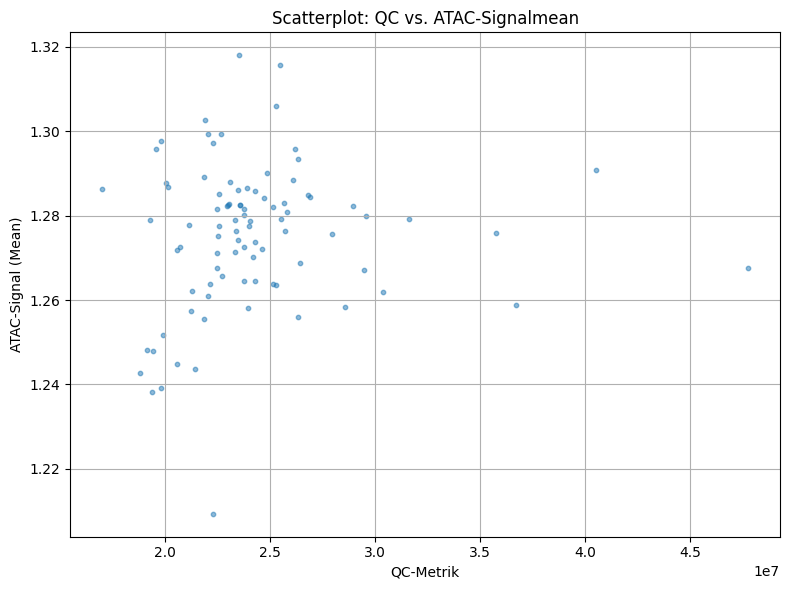

In [30]:
import matplotlib.pyplot as plt

# Wenn qc_vals und atac_vals z. B. Pandas Series sind:
plt.figure(figsize=(8, 6))
plt.scatter(qc_vals, atac_vals, alpha=0.5, s=10)

plt.xlabel("QC-Metrik")
plt.ylabel("ATAC-Signal (Mean)")
plt.title("Scatterplot: QC vs. ATAC-Signalmean")
plt.grid(True)
plt.tight_layout()
plt.show()

(94, 363046)
(181, 11)
Anzahl gemeinsamer Zelltypen: 89
Gemeinsame Zelltypen (Beispiel): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC']

Zelltypen nur in ATAC: ['FRC.SLN', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'mm10.60way.phastCons_scores', 'Summit']
Zelltypen nur in QC: ['FRC.CD140a+.Madcam-.CD35-.SLN']
(89,)
CellType
LTHSC.34-.BM     22287984.0
LTHSC.34+.BM     28588536.0
STHSC.150-.BM    22170346.0
MPP4.135+.BM     24003590.0
proB.CLP.BM      21903414.0
Name: PF.reads, dtype: float64
(89,)


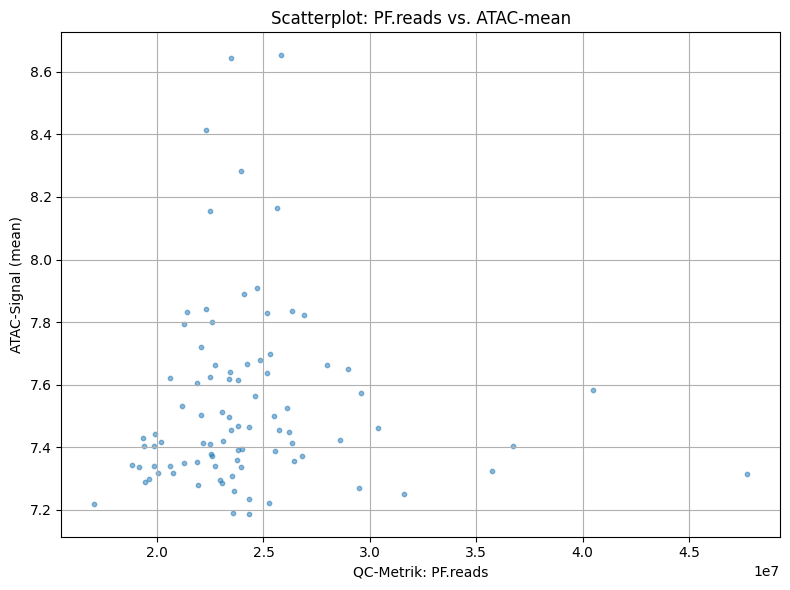

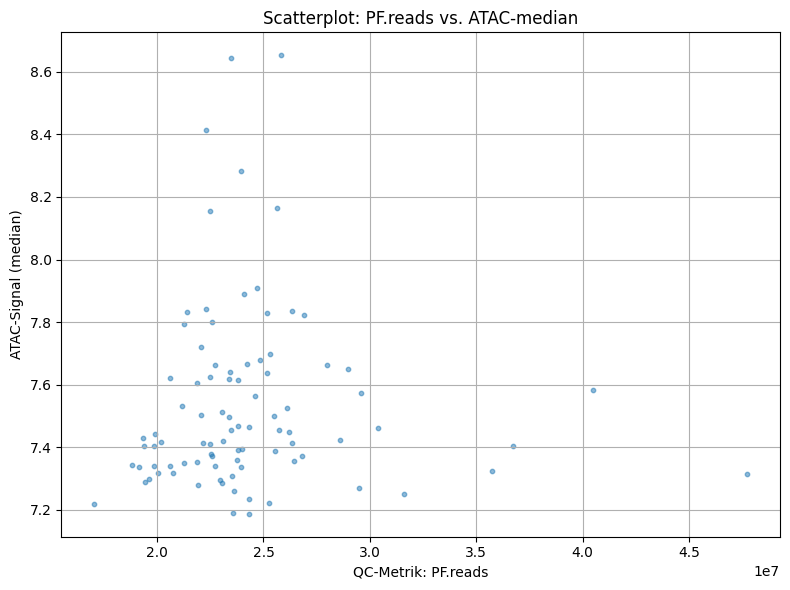

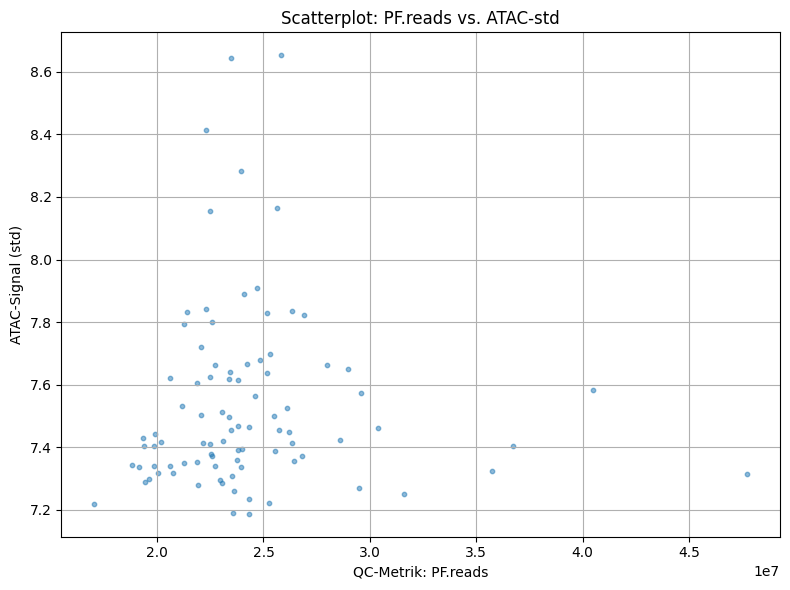

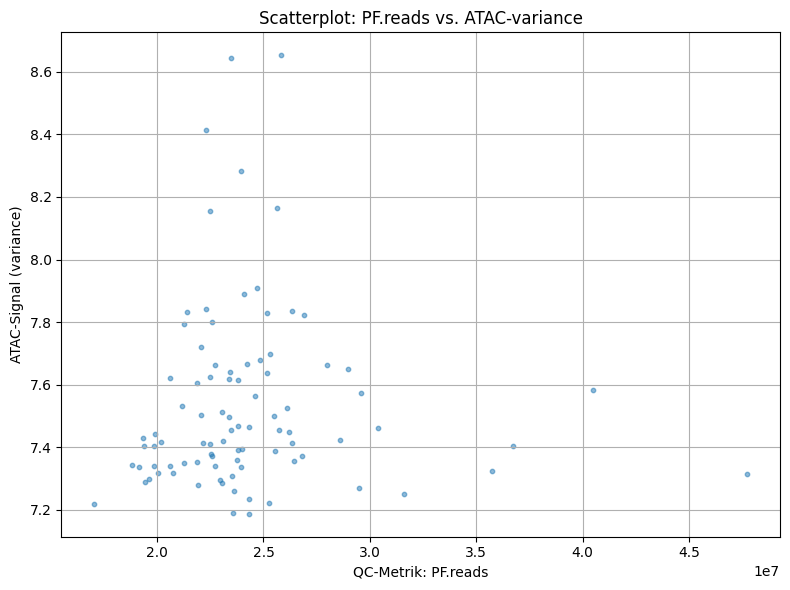

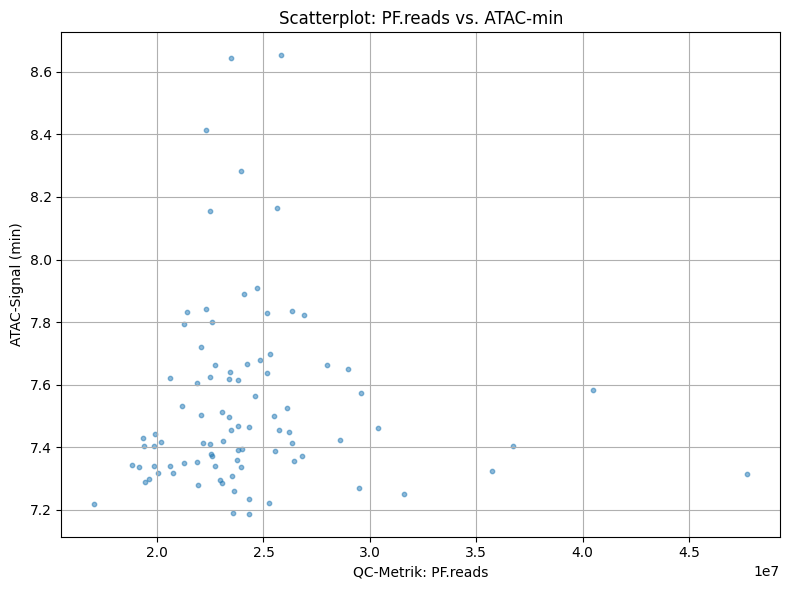

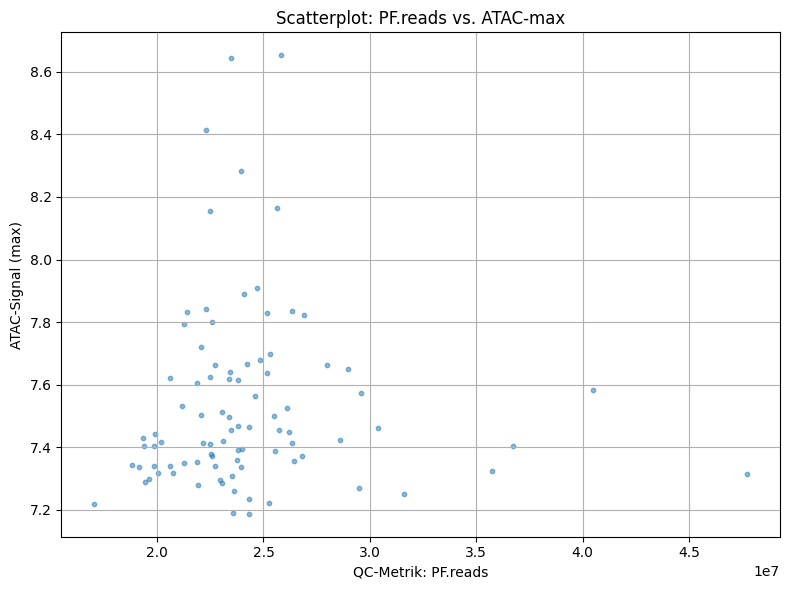

In [32]:
from scipy.stats import pearsonr
atac_data=ATAC.copy()

    
atac_data=atac_data.select_dtypes(include='number')
atac_data=atac_data.T
#print(atac_data.head())
atac_data.drop(['Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis'], axis=0)
#print(atac_data.index)
#print(atac_data.columns)
qc_data=QC.copy() #damit eingabedaten nicht verändert werden

#Index festlegen

qc_data.set_index('CellType', inplace=True)
#print(qc_data.index)
# print(qc_data.columns)

print(atac_data.shape)
print(qc_data.shape)

#atac_data.set_index('ImmGenATAC1219.peakID', inplace=True)
#atac_data.set_index(atac_data.columns[0], inplace=True)
# print(qc_data.index)

# print(atac_data.index)

# Einheitliche Formatierung der Zelltypen
# atac_data.columns = atac_data.columns.astype(str).str.lower().str.replace(" ", "")
# qc_data.columns = qc_data.columns.astype(str).str.lower().str.replace(" ", "")

#qc_data.index = qc_data.index.astype(str).str.lower().str.replace(" ", "")

# Gemeinsame Zelltypen identifizieren
#gemeinsame_zelltypen = set(atac_data.index).intersection(qc_data.index)
gemeinsame_zelltypen = list((atac_data.index).intersection(qc_data.index))

print(f"Anzahl gemeinsamer Zelltypen: {len(gemeinsame_zelltypen)}")
print("Gemeinsame Zelltypen (Beispiel):", list(gemeinsame_zelltypen)[:10])

# Zelltypen, die nur in einem der DataFrames vorkommen
print("\nZelltypen nur in ATAC:", list(set(atac_data.index) - set(qc_data.index))[:10])
print("Zelltypen nur in QC:", list(set(qc_data.index) - set(atac_data.index))[:10])



#common_cells = atac_stat.index.intersection(qc_data.index)
atac_vals = atac_stat.loc[gemeinsame_zelltypen]
#print(atac_vals.head(10))
print(atac_vals.shape)

# qc_metric_col = ['InputCellNumber', 'PF.reads', '%chrM.mapped', 'Paired.read.after.removing.PCR.duplication', '%fragment.1Kb_TSS']


qc_metric_col = 'PF.reads'
qc_data_numeric = qc_data.select_dtypes(include='number')
qc_data_grouped = qc_data_numeric.groupby(qc_data.index).mean()
qc_vals = qc_data_grouped.loc[gemeinsame_zelltypen, qc_metric_col]
print(qc_vals.head())
print(qc_vals.shape)
#print(qc_data.index.

stat_types=['mean', 'median', 'std', 'variance', 'min', 'max']


for stat_type in stat_types: 
    if stat_type=='mean':
        atac_stat=atac_data.mean(axis=1)
    elif stat_type=='median':
        atac_stat=atac_data.median(axis=1)
    elif stat_type=='std':
        atac_stat=atac_data.std(axis=1)
    elif stat_type=='variance':
        atac_stat=atac_data.var(axis=1)
    elif stat_type=='variability':
        atac_stat=atac_data.std(axis=1) #ATAC_dis['variability'] = ATAC_dis['sd'] / (ATAC_dis['mean'] + 1e-6)
    elif stat_type=='min':
        atac_stat=atac_data.min(axis=1)
    elif stat_type=='max':
        atac_stat=atac_data.max(axis=1)


    plt.figure(figsize=(8, 6))
    plt.scatter(qc_vals, atac_vals, alpha=0.5, s=10)
    plt.xlabel(f"QC-Metrik: {qc_metric_col}")
    plt.ylabel(f"ATAC-Signal ({stat_type})")
    plt.title(f"Scatterplot: {qc_metric_col} vs. ATAC-{stat_type}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
#atac_stat=atac_data.mean(axis=1)#.rename('ATAC_stat')



(94, 363046)
(181, 11)
Anzahl gemeinsamer Zelltypen: 89
Gemeinsame Zelltypen (Beispiel): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC']

Zelltypen nur in ATAC: ['FRC.SLN', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'mm10.60way.phastCons_scores', 'Summit']
Zelltypen nur in QC: ['FRC.CD140a+.Madcam-.CD35-.SLN']
(89,)
CellType
LTHSC.34-.BM     10.600
LTHSC.34+.BM      7.700
STHSC.150-.BM    11.130
MPP4.135+.BM     18.960
proB.CLP.BM      15.605
Name: %fragment.1Kb_TSS, dtype: float64
(89,)


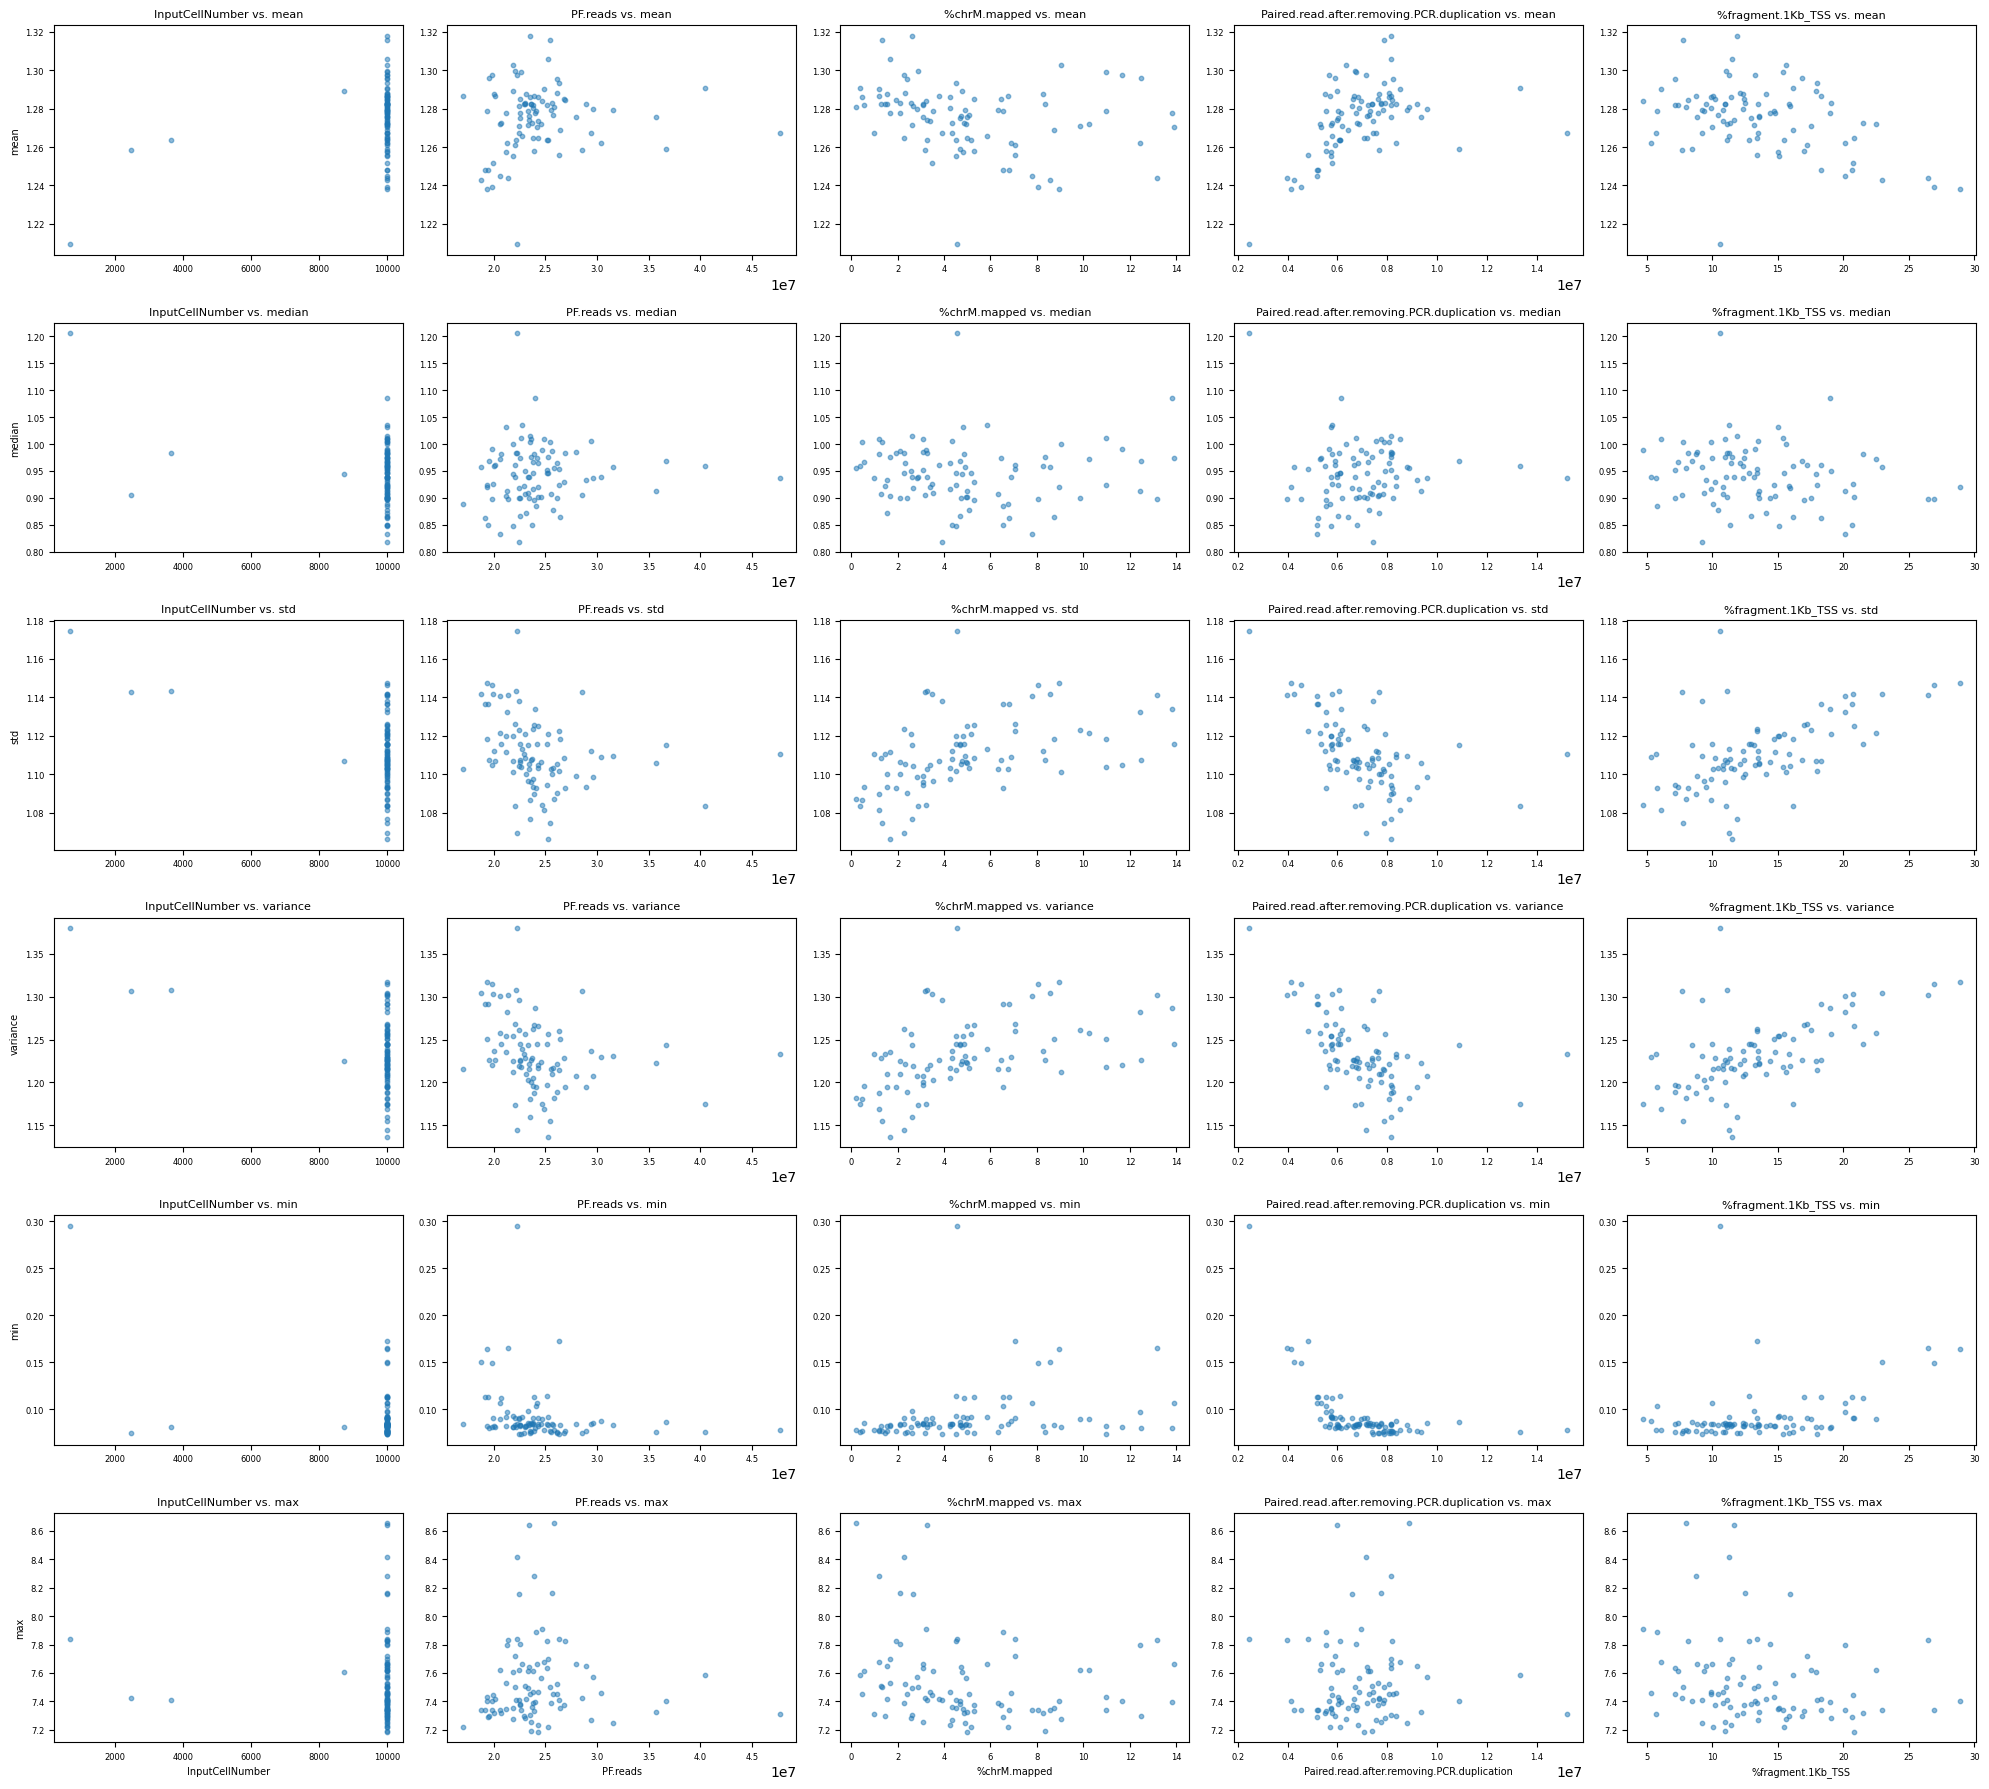

In [42]:
from scipy.stats import pearsonr
atac_data=ATAC.copy()

    
atac_data=atac_data.select_dtypes(include='number')
atac_data=atac_data.T
#print(atac_data.head())
atac_data.drop(['Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis'], axis=0)
#print(atac_data.index)
#print(atac_data.columns)
qc_data=QC.copy() #damit eingabedaten nicht verändert werden

#Index festlegen

qc_data.set_index('CellType', inplace=True)
#print(qc_data.index)
# print(qc_data.columns)

print(atac_data.shape)
print(qc_data.shape)

#atac_data.set_index('ImmGenATAC1219.peakID', inplace=True)
#atac_data.set_index(atac_data.columns[0], inplace=True)
# print(qc_data.index)

# print(atac_data.index)

# Einheitliche Formatierung der Zelltypen
# atac_data.columns = atac_data.columns.astype(str).str.lower().str.replace(" ", "")
# qc_data.columns = qc_data.columns.astype(str).str.lower().str.replace(" ", "")

#qc_data.index = qc_data.index.astype(str).str.lower().str.replace(" ", "")

# Gemeinsame Zelltypen identifizieren
#gemeinsame_zelltypen = set(atac_data.index).intersection(qc_data.index)
gemeinsame_zelltypen = list((atac_data.index).intersection(qc_data.index))

print(f"Anzahl gemeinsamer Zelltypen: {len(gemeinsame_zelltypen)}")
print("Gemeinsame Zelltypen (Beispiel):", list(gemeinsame_zelltypen)[:10])

# Zelltypen, die nur in einem der DataFrames vorkommen
print("\nZelltypen nur in ATAC:", list(set(atac_data.index) - set(qc_data.index))[:10])
print("Zelltypen nur in QC:", list(set(qc_data.index) - set(atac_data.index))[:10])



#common_cells = atac_stat.index.intersection(qc_data.index)

#print(atac_vals.head(10))
print(atac_vals.shape)

# qc_metric_col = ['InputCellNumber', 'PF.reads', '%chrM.mapped', 'Paired.read.after.removing.PCR.duplication', '%fragment.1Kb_TSS']


#qc_metric_col = 'PF.reads'
qc_data_numeric = qc_data.select_dtypes(include='number')
qc_data_grouped = qc_data_numeric.groupby(qc_data.index).mean()

print(qc_vals.head())
print(qc_vals.shape)
#print(qc_data.index.
#atac_stat=atac_data.mean(axis=1)
stat_types=['mean', 'median', 'std', 'variance', 'min', 'max']
qc_metrics=['InputCellNumber', 'PF.reads', '%chrM.mapped', 'Paired.read.after.removing.PCR.duplication', '%fragment.1Kb_TSS']

# Grid erstellen
rows = len(stat_types)
cols = len(qc_metrics)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=False, sharey=False)


for i, stat_type in enumerate(stat_types):
    if stat_type=='mean':
        atac_stat=atac_data.mean(axis=1)
    elif stat_type=='median':
        atac_stat=atac_data.median(axis=1)
    elif stat_type=='std':
        atac_stat=atac_data.std(axis=1)
    elif stat_type=='variance':
        atac_stat=atac_data.var(axis=1)
    elif stat_type=='variability':
        atac_stat=atac_data.std(axis=1) #ATAC_dis['variability'] = ATAC_dis['sd'] / (ATAC_dis['mean'] + 1e-6)
    elif stat_type=='min':
        atac_stat=atac_data.min(axis=1)
    elif stat_type=='max':
        atac_stat=atac_data.max(axis=1)

    atac_vals = atac_stat.loc[gemeinsame_zelltypen]

    for j, qc_metric in enumerate(qc_metrics):
        qc_vals = qc_data_grouped.loc[gemeinsame_zelltypen, qc_metric]
        ax = axes[i, j]
        ax.scatter(qc_vals, atac_vals, alpha=0.5, s=10)
        ax.set_title(f"{qc_metric} vs. {stat_type}", fontsize=8)
        ax.tick_params(labelsize=6)

        if i == rows - 1:
            ax.set_xlabel(qc_metric, fontsize=7)
        if j == 0:
            ax.set_ylabel(stat_type, fontsize=7)



        # plt.figure(figsize=(8, 6))
        # plt.scatter(qc_vals, atac_vals, alpha=0.5, s=10)
        # plt.xlabel(f"QC-Metrik: {qc_metric_col}")
        # plt.ylabel(f"ATAC-Signal ({stat_type})")
        # plt.title(f"Scatterplot: {qc_metric_col} vs. ATAC-{stat_type}")
        # plt.grid(True)
plt.tight_layout()
plt.show()



wichtige Erkenntnis über Bioinfo: wenn die Achsen/Index stimmen, also wenn die Daten richtig eingelesen werden, ist der Rest nicht das Problem!!!

In [11]:
def pearson_correlation_QC_metrics (plot_type, ATAC_data, QC_data, stat_type='mean', qc_metric_col=None):

    '''
    df1: first Dataframe (ATAC)
    df2: second Dataframe (QC)
    qc_metrics_col: welche qc metric soll korreliert werden, spaltenname
    plot_type: scatterplot/heatmap
    '''
    atac_data=ATAC_data.copy()
    
    atac_data=atac_data.select_dtypes(include='number')
    atac_data=atac_data.T
    #print(atac_data.head())
    atac_data.drop(['Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis'], axis=0, inplace=True)
    #print(atac_data.index)
    #print(atac_data.columns)
    qc_data=QC_data.copy() #damit eingabedaten nicht verändert werden
    
    #Index festlegen
    
    
    qc_data.set_index('CellType', inplace=True)
    # print(qc_data.index)
    # print(qc_data.columns)
    
    
    #atac_data.set_index('ImmGenATAC1219.peakID', inplace=True)
    #atac_data.set_index(atac_data.columns[0], inplace=True)
    # print(qc_data.index)

    # print(atac_data.index)

    # Einheitliche Formatierung der Zelltypen
    # atac_data.columns = atac_data.columns.astype(str).str.lower().str.replace(" ", "")
    # qc_data.columns = qc_data.columns.astype(str).str.lower().str.replace(" ", "")

    #qc_data.index = qc_data.index.astype(str).str.lower().str.replace(" ", "")

    # Gemeinsame Zelltypen identifizieren
    gemeinsame_zelltypen = set(atac_data.index).intersection(qc_data.index)
    print(f"Anzahl gemeinsamer Zelltypen: {len(gemeinsame_zelltypen)}")
    print("Gemeinsame Zelltypen (Beispiel):", list(gemeinsame_zelltypen)[:10])

    # Zelltypen, die nur in einem der DataFrames vorkommen
    print("\nZelltypen nur in ATAC:", list(set(atac_data.index) - set(qc_data.index))[:10])
    print("Zelltypen nur in QC:", list(set(qc_data.index) - set(atac_data.index))[:10])

    # QC = QC.drop(QC.columns[0:2], axis=1)
    # QC.index = QC.iloc[:, 1].str.lower().str.replace(" ", "")
    #print(stat_type)
    #return atac_data, qc_data
    if stat_type=='mean':
        atac_stat=atac_data.mean(axis=1)#.rename('ATAC_stat')
    elif stat_type=='median':
        atac_stat=atac_data.median(axis=1)#.rename('ATAC_stat')
    elif stat_type=='std':
        atac_stat=atac_data.std(axis=1)#.rename('ATAC_stat')

    print(atac_stat)
    print(qc_data.head())

    # if qc_metric_col not in qc_data.columns:
    #     raise ValueError(f"QC-Metrik '{qc_metric_col}' nicht gefunden.")
    
    # qc_metric = qc_data[qc_metric_col]
    # print(qc_metric)
    # df=pd.concat([atac_stat, qc_metric], axis=1, join='inner')
    # atac_stat['qc_metric']=qc_data[qc_metric_col]
    # df.columns=['ATAC_stat', qc_metric_col]

    # if len(df)<2:
    #    raise ValueError("Nicht genügend überlappende Zelltypen für Korrelation")


    # # qc_metric=qc_data.set_index('CellType') [[qc_metric_col]]
    # # merged=pd.merge(atac_means, qc_metric, left_index=True, right_index=True)
    # r, p=pearsonr(df['ATAC_stat'], df[qc_metric_col])
    # print(f"pearson-correlation ({stat_type} vs {qc_metric_col}): r= {r:.4f}, p-Wert: {p:.4e}")
     
    #         #Scatterplot
    # if plot_type.lower()=='scatterplot':
    #     plt.figure(figsize=(6,4))
    #     sns.scatterplot(data=df, x='ATAC_mean', y=qc_metric_col)
    #     slope, intercept, *_ = linregress(df['ATAC_mean'], df[qc_metric_col])
    #     x_vals = pd.Series(sorted(df['ATAC_mean']))
    #     y_vals = slope * x_vals + intercept
    #     plt.plot(x_vals, y_vals, color='purple', label='Regression')
    #     plt.xlabel('ATAC seq mean')
    #     plt.ylabel(qc_metric_col)
    #     plt.title(f'ATAC seq-{qc_metric_col}')
    #     plt.legend()
    #     plt.tight_layout()
    #     plt.show()
            
    #         #heatmap
    # elif plot_type.lower()=='heatmap':
    #     plt.figure(figsize=(3,3))
    #     sns.heatmap([[r]], annot=True, cmap='coolwarm', cbar=True, xticklabels=[qc_metric_col], yticklabels=["ATAC_mean"])
    #     plt.title('Pearson correlation')
    #     plt.tight_layout()
    #     plt.show()

In [ ]:
atac_data=ATAC.copy()

    
atac_data=atac_data.select_dtypes(include='number')
atac_data=atac_data.T
#print(atac_data.head())
atac_data.drop(['Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis'], axis=0)
#print(atac_data.index)
#print(atac_data.columns)
qc_data=QC.copy() #damit eingabedaten nicht verändert werden

#Index festlegen

qc_data.set_index('CellType', inplace=True)
#print(qc_data.index)
# print(qc_data.columns)
gemeinsame_zelltypen = list((atac_data.index).intersection(qc_data.index))

print(f"Anzahl gemeinsamer Zelltypen: {len(gemeinsame_zelltypen)}")
print("Gemeinsame Zelltypen (Beispiel):", list(gemeinsame_zelltypen)[:10])

# Zelltypen, die nur in einem der DataFrames vorkommen
print("\nZelltypen nur in ATAC:", list(set(atac_data.index) - set(qc_data.index))[:10])
print("Zelltypen nur in QC:", list(set(qc_data.index) - set(atac_data.index))[:10])

atac_stat=atac_data.mean(axis=1)#.rename('ATAC_stat')


#common_cells = atac_stat.index.intersection(qc_data.index)
atac_vals = atac_stat.loc[gemeinsame_zelltypen]
#print(atac_vals.head(10))
print(atac_vals.shape)

qc_metric_col = 'InputCellNumber'
qc_data_numeric = qc_data.select_dtypes(include='number')
qc_data_grouped = qc_data_numeric.groupby(qc_data.index).mean()
qc_vals = qc_data_grouped.loc[gemeinsame_zelltypen, qc_metric_col]
print(qc_vals.head())
print(qc_vals.shape)
#print(qc_data.index.value_counts())
#print(qc_vals.head(10))
# print("ATAC-Werte Länge:", len(atac_vals))
# print("QC-Werte Länge:", len(qc_vals))
# print("Fehlende Werte in QC:", qc_vals.isna().sum())
# print("Fehlende Werte in ATAC:", atac_vals.isna().sum())



In [17]:
from scipy.stats import pearsonr
atac_data=ATAC.copy()

    
atac_data=atac_data.select_dtypes(include='number')
atac_data=atac_data.T
#print(atac_data.head())
atac_data.drop(['Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis'], axis=0)
#print(atac_data.index)
#print(atac_data.columns)
qc_data=QC.copy() #damit eingabedaten nicht verändert werden

#Index festlegen

qc_data.set_index('CellType', inplace=True)
#print(qc_data.index)
# print(qc_data.columns)

print(atac_data.shape)
print(qc_data.shape)

#atac_data.set_index('ImmGenATAC1219.peakID', inplace=True)
#atac_data.set_index(atac_data.columns[0], inplace=True)
# print(qc_data.index)

# print(atac_data.index)

# Einheitliche Formatierung der Zelltypen
# atac_data.columns = atac_data.columns.astype(str).str.lower().str.replace(" ", "")
# qc_data.columns = qc_data.columns.astype(str).str.lower().str.replace(" ", "")

#qc_data.index = qc_data.index.astype(str).str.lower().str.replace(" ", "")

# Gemeinsame Zelltypen identifizieren
#gemeinsame_zelltypen = set(atac_data.index).intersection(qc_data.index)
gemeinsame_zelltypen = list((atac_data.index).intersection(qc_data.index))

print(f"Anzahl gemeinsamer Zelltypen: {len(gemeinsame_zelltypen)}")
print("Gemeinsame Zelltypen (Beispiel):", list(gemeinsame_zelltypen)[:10])

# Zelltypen, die nur in einem der DataFrames vorkommen
print("\nZelltypen nur in ATAC:", list(set(atac_data.index) - set(qc_data.index))[:10])
print("Zelltypen nur in QC:", list(set(qc_data.index) - set(atac_data.index))[:10])

atac_stat=atac_data.mean(axis=1)#.rename('ATAC_stat')


#common_cells = atac_stat.index.intersection(qc_data.index)
atac_vals = atac_stat.loc[gemeinsame_zelltypen]
#print(atac_vals.head(10))
print(atac_vals.shape)

qc_metric_col = 'InputCellNumber'
qc_data_numeric = qc_data.select_dtypes(include='number')
qc_data_grouped = qc_data_numeric.groupby(qc_data.index).mean()
qc_vals = qc_data_grouped.loc[gemeinsame_zelltypen, qc_metric_col]
print(qc_vals.head())
print(qc_vals.shape)
#print(qc_data.index.value_counts())
#print(qc_vals.head(10))
# print("ATAC-Werte Länge:", len(atac_vals))
# print("QC-Werte Länge:", len(qc_vals))
# print("Fehlende Werte in QC:", qc_vals.isna().sum())
# print("Fehlende Werte in ATAC:", atac_vals.isna().sum())

r, p_value=pearsonr(atac_vals, qc_vals)
print(f"Pearson r = {r:.3f}, p = {p_value:.3g}")

(94, 363046)
(181, 11)
Anzahl gemeinsamer Zelltypen: 89
Gemeinsame Zelltypen (Beispiel): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC']

Zelltypen nur in ATAC: ['FRC.SLN', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'mm10.60way.phastCons_scores', 'Summit']
Zelltypen nur in QC: ['FRC.CD140a+.Madcam-.CD35-.SLN']
(89,)
CellType
LTHSC.34-.BM       677.0
LTHSC.34+.BM      2483.0
STHSC.150-.BM     3660.0
MPP4.135+.BM     10000.0
proB.CLP.BM      10000.0
Name: InputCellNumber, dtype: float64
(89,)
Pearson r = 0.365, p = 0.000438


In [5]:
from scipy.stats import pearsonr
atac_data=ATAC.copy()

    
atac_data=atac_data.select_dtypes(include='number')
atac_data=atac_data.T
#print(atac_data.head())
atac_data.drop(['Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis'], axis=0)
#print(atac_data.index)
#print(atac_data.columns)
qc_data=QC.copy() #damit eingabedaten nicht verändert werden

#Index festlegen

qc_data.set_index('CellType', inplace=True)
#print(qc_data.index)
# print(qc_data.columns)

print(atac_data.shape)
print(qc_data.shape)

#atac_data.set_index('ImmGenATAC1219.peakID', inplace=True)
#atac_data.set_index(atac_data.columns[0], inplace=True)
# print(qc_data.index)

# print(atac_data.index)

# Einheitliche Formatierung der Zelltypen
# atac_data.columns = atac_data.columns.astype(str).str.lower().str.replace(" ", "")
# qc_data.columns = qc_data.columns.astype(str).str.lower().str.replace(" ", "")

#qc_data.index = qc_data.index.astype(str).str.lower().str.replace(" ", "")

# Gemeinsame Zelltypen identifizieren
#gemeinsame_zelltypen = set(atac_data.index).intersection(qc_data.index)
gemeinsame_zelltypen = list((atac_data.index).intersection(qc_data.index))

print(f"Anzahl gemeinsamer Zelltypen: {len(gemeinsame_zelltypen)}")
print("Gemeinsame Zelltypen (Beispiel):", list(gemeinsame_zelltypen)[:10])

# Zelltypen, die nur in einem der DataFrames vorkommen
print("\nZelltypen nur in ATAC:", list(set(atac_data.index) - set(qc_data.index))[:10])
print("Zelltypen nur in QC:", list(set(qc_data.index) - set(atac_data.index))[:10])

atac_stat_methods=['mean', 'median', 'std', 'variance', 'min', 'max']
qc_metric_col = ['InputCellNumber', 'PF.reads', '%chrM.mapped', 'Paired.read.after.removing.PCR.duplication', '%fragment.1Kb_TSS']

qc_data_numeric = qc_data.select_dtypes(include='number')
qc_data_grouped = qc_data_numeric.groupby(qc_data.index).mean()


def atac_stats_values(atac_data, gemeinsame_zelltypen, stat_type):
    if stat_type=='mean':
        atac_stat=atac_data.mean(axis=1)
    elif stat_type=='median':
        atac_stat=atac_data.median(axis=1)
    elif stat_type=='std':
        atac_stat=atac_data.std(axis=1)
    elif stat_type=='variance':
        atac_stat=atac_data.var(axis=1)
    elif stat_type=='variability':
        atac_stat=atac_data.std(axis=1) #ATAC_dis['variability'] = ATAC_dis['sd'] / (ATAC_dis['mean'] + 1e-6)
    elif stat_type=='min':
        atac_stat=atac_data.min(axis=1)
    elif stat_type=='max':
        atac_stat=atac_data.max(axis=1)

#ATAC_dis['range'] = ATAC_dis['max'] - ATAC_dis['min']


    #common_cells = atac_stat.index.intersection(qc_data.index)
    atac_vals = atac_stat.loc[gemeinsame_zelltypen]
    #print(atac_vals.head(10))
    print(atac_vals.shape)
    
    # print(qc_vals.head())
    # print(qc_vals.shape)
    #print(qc_data.index.value_counts())
    #print(qc_vals.head(10))
    # print("ATAC-Werte Länge:", len(atac_vals))
    # print("QC-Werte Länge:", len(qc_vals))
    # print("Fehlende Werte in QC:", qc_vals.isna().sum())
    # print("Fehlende Werte in ATAC:", atac_vals.isna().sum())

    # r, p_value=pearsonr(atac_vals, qc_vals[qc_col])
    # print(f"Pearson r = {r:.3f}, p = {p_value:.3g}")

    return atac_vals

first_run=True
idx=0

for stat_type in atac_stat_methods:
    atac_vals=atac_stats_values(atac_data, gemeinsame_zelltypen, stat_type)
    list_r=[]
    list_p=[]
    for qc_col in qc_metric_col:

        qc_vals = qc_data_grouped.loc[gemeinsame_zelltypen, qc_col]

        r, p_value=pearsonr(atac_vals, qc_vals)
        print(f"Pearson r = {r:.3f}, p = {p_value:.3g}")

        list_r.append(r)
        list_p.append(p_value)


        # if first_run:
        #     results_df=pd.DataFrame({'stat_type': stat_type, 'qc_metric_col':qc_col, 'r': r, 'p_value': p_value}, index=[idx])
        #     first_run=False
        # else:
        #     temp_df=pd.DataFrame({'stat_type': stat_type, 'qc_metric_col':qc_col, 'r': r, 'p_value': p_value}, index=[idx])
        #     results_df=pd.concat([results_df, temp_df], axis=0)
        # idx+=1

    if first_run:
        r_df=pd.DataFrame({stat_type: list_r}, index=qc_metric_col)
        first_run=False
    else:
        temp_df=pd.DataFrame({stat_type: list_r}, index=qc_metric_col)
        r_df=pd.concat([r_df, temp_df], axis=1)



(94, 363046)
(181, 11)
Anzahl gemeinsamer Zelltypen: 89
Gemeinsame Zelltypen (Beispiel): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC']

Zelltypen nur in ATAC: ['_-log10_bestPvalue', 'Included.in.systematic.analysis', 'FRC.SLN', 'mm10.60way.phastCons_scores', 'Summit']
Zelltypen nur in QC: ['FRC.CD140a+.Madcam-.CD35-.SLN']
(89,)
Pearson r = 0.365, p = 0.000438
Pearson r = 0.099, p = 0.358
Pearson r = -0.260, p = 0.0139
Pearson r = 0.443, p = 1.41e-05
Pearson r = -0.403, p = 8.99e-05
(89,)
Pearson r = -0.339, p = 0.00117
Pearson r = 0.063, p = 0.554
Pearson r = -0.005, p = 0.966
Pearson r = -0.017, p = 0.875
Pearson r = -0.179, p = 0.0932
(89,)
Pearson r = -0.438, p = 1.74e-05
Pearson r = -0.262, p = 0.0131
Pearson r = 0.465, p = 4.4e-06
Pearson r = -0.541, p = 4.43e-08
Pearson r = 0.569, p = 5.97e-09
(89,)
Pearson r = -0.445, p = 1.24e-05
Pearson r = -0.263, p = 0.0127
Pearson r = 0.46

In [6]:
r_df

,mean,median,std,variance,min,max
InputCellNumber,0.364915,-0.338670,-0.438313,-0.445062,-0.455801,-0.035787
PF.reads,0.098657,0.063500,-0.262145,-0.263093,-0.215071,0.002224
%chrM.mapped,-0.259811,-0.004579,0.465041,0.462397,0.252207,-0.228168
Paired.read.after.removing.PCR.duplication,0.442584,-0.016957,-0.540937,-0.542591,-0.564805,-0.012545
%fragment.1Kb_TSS,-0.403066,-0.179051,0.568991,0.568088,0.336594,-0.223412


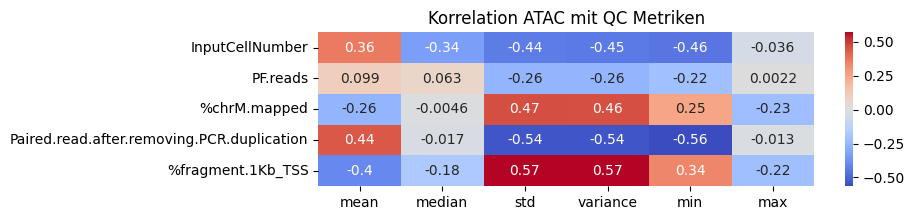

In [ ]:
import seaborn as sns

# correlations={}
# for col in qc_metric_col:
#     r, p_value=pearsonr(atac_vals, qc_vals[col])
#     correlations[col]=r
#     print(f"Pearson r for {col}= {r:.3f}, p = {p_value:.3g}")

# corr_df = pd.DataFrame(correlations, index=['Pearson r'])

plt.figure(figsize=(8, 2))
sns.heatmap(r_df, annot=True, cmap='coolwarm', center=0)
plt.title('Korrelation ATAC mit QC Metriken')
plt.show()

#farbe bis 1


In [33]:
atac_data=atac_vals
atac_data=atac_data.select_dtypes(include='number')
atac_data=atac_data.T
#print(atac_data.head())
atac_data.drop(['Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis'], axis=0)
#print(atac_data.index)
# Beispiel: Wenn atac_data Zeilen Zelltypen sind, direkt std pro Zelltyp:
std_per_celltype = atac_data.groupby(atac_data.index).std()

# Wir machen daraus ein langes Format zum Plotten
std_long = std_per_celltype.melt(ignore_index=False).reset_index()
std_long.columns = ['CellType', 'Peak', 'std']

plt.figure(figsize=(15,6))
sns.boxplot(data=std_long, x='CellType', y='std')
plt.xticks(rotation=90)
plt.title("Signalvariabilität (std) pro Zelltyp")
plt.xlabel("Zelltyp")
plt.ylabel("Standardabweichung (std) pro Peak")
plt.tight_layout()
plt.show()

AttributeError: 'Series' object has no attribute 'select_dtypes'

In [30]:
sns.boxplot(data=atac_vals[['mean', 'median', 'std']])
plt.title("Signalmetriken über Zelltypen")
plt.show()

KeyError: "None of [Index(['mean', 'median', 'std'], dtype='object')] are in the [index]"

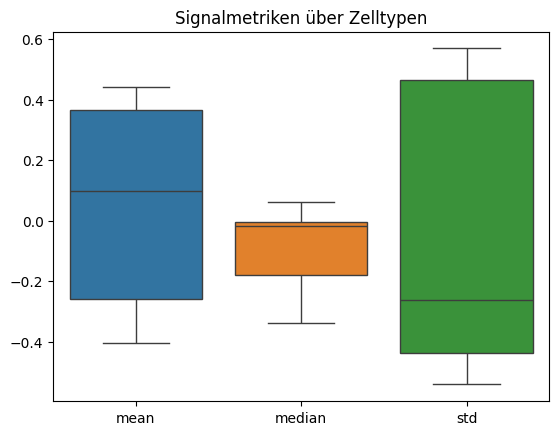

In [9]:
sns.boxplot(data=r_df[['mean', 'median', 'std']])
plt.title("Signalmetriken über Zelltypen")
plt.show()

In [29]:
# Beispiel: atac_stats enthält Spalten 'CellType' und 'std'
plt.figure(figsize=(12,6))
sns.boxplot(data=atac_data, x='CellType', y='std')
plt.xticks(rotation=90)
plt.title("Verteilung der Standardabweichung (std) je Zelltyp")
plt.ylabel("Standardabweichung (std)")
plt.xlabel("Zelltyp")
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `CellType` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
atac_stats = pd.DataFrame({
    "mean": atac_data.mean(axis=1),
    "median": atac_data.median(axis=1),
    "std": atac_data.std(axis=1)
})

# Top 10 nach Standardabweichung
atac_stats.sort_values("std", ascending=False).head(20)

,mean,median,std
Summit,7.593955e+07,7.359295e+07,4.430626e+07
_-log10_bestPvalue,6.582067e+00,3.620000e+00,8.731544e+00
LTHSC.34-.BM,1.209332e+00,1.205769e+00,1.174684e+00
NK.27+11b+.BM,1.238274e+00,9.192383e-01,1.147693e+00
NK.27+11b+.Sp,1.239263e+00,8.978738e-01,1.146569e+00
...,...,...,...
B.PB.Sp,1.315643e+00,1.004646e+00,1.074697e+00
B.Fo.Sp,1.297331e+00,9.839762e-01,1.069490e+00
Mo.6C-II-.Bl,1.306053e+00,9.761850e-01,1.066102e+00
mm10.60way.phastCons_scores,1.773167e-01,9.000000e-02,2.107436e-01


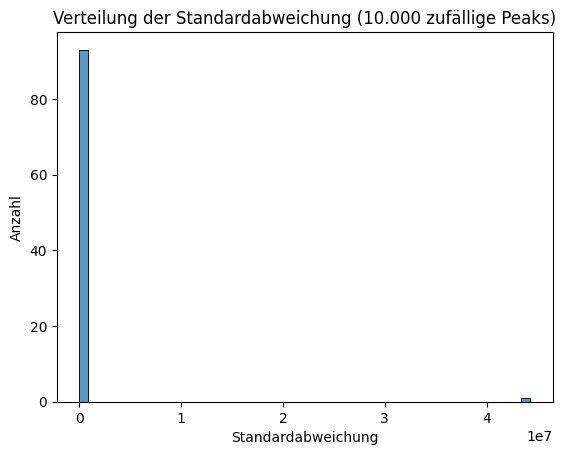

In [26]:
#Nehme zufällig 10.000 Werte aus der 'std'-Spalte
sampled_std = atac_stats['std'].sample(n=94, random_state=42)

# Plot
sns.histplot(sampled_std, bins=50, kde=False)
plt.title("Verteilung der Standardabweichung (10.000 zufällige Peaks)")
plt.xlabel("Standardabweichung")
plt.ylabel("Anzahl")
plt.show()

MemoryError: Unable to allocate 33.9 GiB for an array with shape (4554634654,) and data type float64

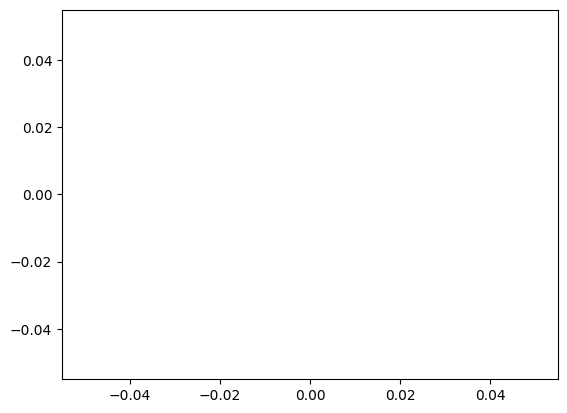

In [18]:
sns.histplot(atac_stats['std'], kde=False)
plt.title("Verteilung der Standardabweichung (std)")
plt.xlabel("Standardabweichung")
plt.ylabel("Anzahl Peaks/Gene")
plt.show()

In [15]:
atac_stat=atac_data.std(axis=1)
atac_stat['std'].sort_values(ascending=False).head(10)

KeyError: 'std'

In [13]:
r_df['std'].sort_values(ascending=False).head(10)

%fragment.1Kb_TSS                             0.568991
%chrM.mapped                                  0.465041
PF.reads                                     -0.262145
InputCellNumber                              -0.438313
Paired.read.after.removing.PCR.duplication   -0.540937
Name: std, dtype: float64

In [14]:
atac_stat, qc_data=pearson_correlation_QC_metrics (plot_type='heatmap', ATAC_data=ATAC, QC_data=QC, stat_type='mean', qc_metric_col='InputCellNumber')

atac_vals = atac_data.loc[gemeinsame_zelltypen]
#print(atac_vals.head(10))
print(atac_vals.shape)
qc_metric_col = 'InputCellNumber'
qc_vals = qc_data.loc[gemeinsame_zelltypen, qc_metric_col]
print(qc_vals.shape)
#print(qc_vals.head(10))
# print("ATAC-Werte Länge:", len(atac_vals))
# print("QC-Werte Länge:", len(qc_vals))
# print("Fehlende Werte in QC:", qc_vals.isna().sum())
# print("Fehlende Werte in ATAC:", atac_vals.isna().sum())

r, p_value=pearsonr(atac_vals, qc_vals)
print(f"Pearson r = {r:.3f}, p = {p_value:.3g}")

Anzahl gemeinsamer Zelltypen: 89
Gemeinsame Zelltypen (Beispiel): ['T.4.Sp.aCD3+CD40.18hr', 'B.Sp', 'ILC3.NKp46-CCR6-.SI', 'Treg.4.25hi.Sp', 'Ep.MEChi.Th', 'preT.DN1.Th', 'T8.Tem.LCMV.d180.Sp', 'NK.27+11b-.BM', 'NK.27+11b+.BM', 'preB.FrD.BM']

Zelltypen nur in ATAC: ['FRC.SLN']
Zelltypen nur in QC: ['FRC.CD140a+.Madcam-.CD35-.SLN']
LTHSC.34-.BM     1.209332
LTHSC.34+.BM     1.258308
STHSC.150-.BM    1.263741
MPP4.135+.BM     1.277657
proB.CLP.BM      1.302637
                   ...   
FRC.SLN          1.258732
IAP.SLN          1.318027
BEC.SLN          1.258927
LEC.SLN          1.261929
Ep.MEChi.Th      1.278902
Length: 90, dtype: float64
              ImmGenLab    Lineage      CellFamily        Organ  \
CellType                                                          
LTHSC.34-.BM     Wagers  Stem&Prog  Stem&Prog Cell  Bone Marrow   
LTHSC.34+.BM     Wagers  Stem&Prog  Stem&Prog Cell  Bone Marrow   
STHSC.150-.BM    Wagers  Stem&Prog  Stem&Prog Cell  Bone Marrow   
MPP4.135+.BM     W

TypeError: cannot unpack non-iterable NoneType object

In [82]:
qc_data['InputCellNumber']

CellType
LTHSC.34-.BM       677
LTHSC.34+.BM      2483
STHSC.150-.BM     3660
MPP4.135+.BM     10000
proB.CLP.BM      10000
                 ...  
BEC.SLN          10000
LEC.SLN          10000
LEC.SLN          10000
Ep.MEChi.Th      10000
Ep.MEChi.Th      10000
Name: InputCellNumber, Length: 181, dtype: int64

In [80]:
atac_data, qc_data=pearson_correlation_QC_metrics (plot_type='heatmap', ATAC_data=ATAC, QC_data=QC, stat_type='mean', qc_metric_col='InputCellNumber')


Anzahl gemeinsamer Zelltypen: 89
Gemeinsame Zelltypen (Beispiel): ['T.DN4.Th', 'B.FrE.BM', 'MPP4.135+.BM', 'DC.pDC.Sp', 'GN.BM', 'B.PB.Sp', 'MPP3.48+.BM', 'T.DP.Th', 'preB.FrD.BM', 'preT.DN2a.Th']

Zelltypen nur in ATAC: ['FRC.SLN']
Zelltypen nur in QC: ['FRC.CD140a+.Madcam-.CD35-.SLN']
LTHSC.34-.BM     1.640108
LTHSC.34+.BM     1.739950
STHSC.150-.BM    1.751400
MPP4.135+.BM     1.780920
proB.CLP.BM      1.823342
                   ...   
FRC.SLN          1.724343
IAP.SLN          1.831062
BEC.SLN          1.710356
LEC.SLN          1.699517
Ep.MEChi.Th      1.772441
Length: 90, dtype: float64
CellType
LTHSC.34-.BM       677
LTHSC.34+.BM      2483
STHSC.150-.BM     3660
MPP4.135+.BM     10000
proB.CLP.BM      10000
                 ...  
BEC.SLN          10000
LEC.SLN          10000
LEC.SLN          10000
Ep.MEChi.Th      10000
Ep.MEChi.Th      10000
Name: InputCellNumber, Length: 181, dtype: int64


TypeError: cannot unpack non-iterable NoneType object

In [69]:
#atac_data.columns
atac_data.mean(axis=1)

LTHSC.34-.BM     1.640108
LTHSC.34+.BM     1.739950
STHSC.150-.BM    1.751400
MPP4.135+.BM     1.780920
proB.CLP.BM      1.823342
                   ...   
FRC.SLN          1.724343
IAP.SLN          1.831062
BEC.SLN          1.710356
LEC.SLN          1.699517
Ep.MEChi.Th      1.772441
Length: 90, dtype: float64

In [8]:
QC = data['QC_metrics']
QC.head()
# qc_data=QC
# qc_data=qc_data.iloc[:, 1:]
# qc_data.index=qc_data.iloc[:, 0:]
# qc_data.index = qc_data.index.astype(str).str.lower().str.replace(" ", "")
# #qc_data.head()

,CellType,ImmGenLab,Lineage,CellFamily,Organ,SortingMarkers,InputCellNumber,PF.reads,%chrM.mapped,Paired.read.after.removing.PCR.duplication,%fragment.1Kb_TSS,Replicate.cor
SampleName,,,,,,,,,,,,
LTHSC.34-.BM#1,LTHSC.34-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34-,677,22287984,4.58,2470102,10.60,NaN
LTHSC.34+.BM#1,LTHSC.34+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34+,2483,28588536,3.17,7675501,7.70,NaN
STHSC.150-.BM#1,STHSC.150-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150-CD48-,3660,22170346,3.25,6060045,11.13,NaN
MPP4.135+.BM#1,MPP4.135+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135+,10000,24003590,13.83,6128252,18.96,NaN
proB.CLP.BM#1,proB.CLP.BM,Hardy,B,B Cell,Bone Marrow,CD19-IgM-CD43+CD24-CD45R-CD93+CD117+IL7Ra+PI-D...,10000,23578208,7.67,6588564,13.21,0.868


was muss ich in pearson r reinstecken: von hand machen!
größe reduzieren

ist functions falsch?

zeilenweise aus functions rauskopieren udn immer raus geben

return atac data

von hand die function nicht als funktion, von hand basteln -> wo fehler

von hand überprüfen ob das richtige ruaskommt

zb gucken ob das mit erste spalte löschen geklappt hat, schritt für schritt

erst von hand dann function

clean up in functions aus meiner funktion löschen, damit es allgemeiner ist
sonst meine funktion zweiteilen und eigenes cleanup machen(oberen teil)

In [ ]:
df1=ATAC.head(20)
df2=QC.head(20)

df1.mean(axis=1)

In [19]:
#plot_type, atac_data, qc_data, qc_metric_col=None
pearson_correlation_QC_metrics(plot_type='scatterplot', ATAC_data=ATAC, QC_data=QC, stat_type='mean', qc_metric_col='InputCellNumber')

ImmGenATAC1219.peakID           ImmGenATAC1219.peak_3 ImmGenATAC1219.peak_4  \
chrom                                            chr1                  chr1   
Summit                                        3120109               3121485   
mm10.60way.phastCons_scores                      0.07                  0.15   
_-log10_bestPvalue                               10.8                  3.02   
Included.in.systematic.analysis                   1.0                   1.0   

ImmGenATAC1219.peakID           ImmGenATAC1219.peak_5 ImmGenATAC1219.peak_6  \
chrom                                            chr1                  chr1   
Summit                                        3372787               3399217   
mm10.60way.phastCons_scores                      0.03                  0.06   
_-log10_bestPvalue                               1.31                  2.39   
Included.in.systematic.analysis                   NaN                   1.0   

ImmGenATAC1219.peakID           ImmGenATAC1219.pea

In [32]:
import pandas as pd
from scipy.stats import spearmanr

def correlate_atac_with_qc(ATAC, QC):
    # 1. Zelltypen aus QC extrahieren:
    # Erste Zeile in QC enthält zelltyp+`#`, zweite Zeile die echten zelltyp-Namen
    # Also nehmen wir die zweite Zeile als neue Spaltennamen und löschen die erste Zeile

    # QC Spaltennamen (erstes Header-Level)
    qc_first_row = QC.iloc[0]
    # Echte Zelltypen (zweite Zeile)
    qc_second_row = QC.iloc[1]

    # Ersetze Spaltennamen in QC durch zweite Zeile
    QC.columns = qc_second_row
    # Entferne die ersten zwei Zeilen (Header + extra Zeile)
    QC = QC.iloc[2:].reset_index(drop=True)

    # 2. Mittelwerte aus ATAC berechnen (pro Zelltyp = Spalte)
    # Angenommen, alle Spalten in ATAC sind Zelltypen, oder filtere entsprechend:
    atac_numeric = ATAC.select_dtypes(include='number')
    mean_per_celltype = atac_numeric.mean(axis=0)

    mean_df = mean_per_celltype.reset_index()
    mean_df.columns = ['CellType', 'MeanValue']

    # 3. QC numerische Werte auswählen (z.B. nur die numerischen Spalten)
    qc_numeric = QC.select_dtypes(include='number')

    # 4. QC Zelltypen und Mean Zelltypen auf gemeinsamen Schnitt bringen
    # Wichtig: QC Spalten = Zelltypen, aber QC ist transponiert, daher brauchen wir Zelltypen als Spalten oder Zeilen?
    # Nehmen wir an QC Zelltypen sind Spalten (nach Ersetzen der Spaltennamen), dann müssen wir QC transponieren, um Zelltypen als Zeilen zu haben:
    qc_numeric = qc_numeric.transpose()
    qc_numeric.columns = QC.index  # zelltyp-spezifische Messungen pro Metrik
    
    # qc_numeric index sind jetzt Zelltypen
    qc_numeric.index.name = 'CellType'
    qc_numeric.reset_index(inplace=True)

    # 5. Zusammenführen nach Zelltyp (mean_df und qc_numeric)
    merged = pd.merge(mean_df, qc_numeric, on='CellType', how='inner')

    # 6. Spearman-Korrelation zwischen MeanValue und allen QC-Metriken berechnen
    correlations = {}
    for qc_metric in merged.columns:
        if qc_metric in ['CellType', 'MeanValue']:
            continue
        corr, pval = spearmanr(merged['MeanValue'], merged[qc_metric])
        correlations[qc_metric] = {'Spearman_r': corr, 'p_value': pval}

    return pd.DataFrame.from_dict(correlations, orient='index')

# Beispiel:
# result = correlate_atac_with_qc(ATAC, QC)
# print(result)


In [33]:
correlate_atac_with_qc(ATAC, QC)

ValueError: You are trying to merge on object and float64 columns for key 'CellType'. If you wish to proceed you should use pd.concat

In [2]:
atac_data=pd.read_csv("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\processed atac seq data and called peaks.csv")
print(mean_atac_data.loc['LTHSC.34-.BM'])

MemoryError: Unable to allocate 364. MiB for an array with shape (93, 512595) and data type float64

In [2]:
#Datei einlesen
atac_data=pd.read_csv("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\processed atac seq data and called peaks.csv")

#zelltypnamen aus erster zeile nehmen
celltype_names=atac_data.iloc[0, 8:]

# nur peakdaten benutzen und restliche spalten auslassen
score_abgd=atac_data.iloc[1:, 8:].copy().astype(float)

# log2 Transformation
peak_signal_log = np.log2(score_abgd+1)

#Zelltypnamen als Spaltennamen benutzen
peak_signal_log.columns=celltype_names.values

#mean berechnen pro zelltyp
mean=peak_signal_log.groupby(peak_signal_log.columns, axis=1).mean()
cell_means=mean.mean(axis=0)

#Transponieren
mean_T=cell_means.T

#dataframe
mean_df=mean_T.to_frame(name='mean_accessibility')
mean_df.index.name='Zelltyp'


print(mean_T.head())


C:\Users\User\AppData\Local\Temp\ipykernel_16112\764912592.py:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean=peak_signal_log.groupby(peak_signal_log.columns, axis=1).mean()


Zelltyp
0.10    1.545527
0.11    1.549998
0.12    1.521084
0.13    1.570888
0.14    1.544796
dtype: float64


### pearson correlation definition

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress
from itertools import combinations

cell_type=["T.4.Th", "T.8.Th", "T.4.Nve.Sp"]
atac_data=pd.read_csv("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\processed atac seq data and called peaks.csv", usecols=cell_type)
atac_data.index=atac_data.index.astype(str).str.lower().str.replace(" ","")
rna_data=pd.read_csv("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\processed rna seq data.csv").T
qc_metrics=pd.read_excel("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\summary of immune cell populationsprofiled by atac.xlsx")
qc_metrics_cutoff=qc_metrics.iloc[:,1:]
qc_metrics_cutoff.index=qc_metrics_cutoff.index.astype(str).str.lower().str.replace(" ","")

print(atac_data.shape)
print(rna_data.shape)


(512595, 3)
(87, 17535)


In [6]:

def pearson_correlation (plot_type, cell_list, df1, df1_name, df2=None, df2_name=None):

    '''
    df1: first Dataframe
    df2: second Dataframe
    df1_name: atac/rna/qc/...
    df2_name: atac/rna/qc/...
    cell1: name of row/celltype of cell 1
    cell2: name of row/celltype of cell 2
    plot_type: scatterplot/heatmap
    '''

    # wenn nur ein dataframe gegeben ist, sind beide df1
    if df2 is None:
        df2=df1
        df2_name=df1_name

    # falls nur ein df, alle Kombinationen der verschiedenen Zellen miteinander

    if df1 is df2:
        corr_matrix=pd.DataFrame(index=cell_list, columns=cell_list, dtype=float)
        pval_matrix=pd.DataFrame(index=cell_list, columns=cell_list, dtype=float)

        for cell1 in cell_list: 
            for cell2 in cell_list:
                row1=pd.to_numeric(df1.loc[cell1], errors='coerce')
                row2=pd.to_numeric(df2.loc[cell2], errors='coerce')

    # pearson correlation
                r, p=pearsonr(row1, row2)
                corr_matrix.loc[cell1, cell2]=r
                pval_matrix.loc[cell1, cell2]=p

    #scatterplot
        if plot_type.lower()=='scatterplot':
            print("Für mehrere Zellen aus einem Datensatz ist es sinnvoller heatmap zu benutzen.")
            
    #heatmap
        elif plot_type.lower()=='heatmap':
            plt.figure(figsize=(3,3))
            sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm')
            plt.title(f'heatmap{df1_name}')
            plt.tight_layout()
            plt.show()
    else:
        for cell in cell_list: 
            row1=pd.to_numeric(df1.loc[cell1], errors='coerce')
            row2=pd.to_numeric(df2.loc[cell2], errors='coerce')
            r, p_wert=pearsonr(row1, row2)
            print(f"pearson-correlation: r= {r:.4f}, p-Wert: {p_wert:.4e}") 

            #Scatterplot
            if plot_type.lower()=='scatterplot':
                plt.figure(figsize=(6,4))
                sns.scatterplot(x=row1, y=row2)
                slope, intercept, _, _, _ = linregress(row1, row2)
                x_vals = pd.Series(sorted(row1))
                y_vals = slope * x_vals + intercept
                plt.plot(x_vals, y_vals, color='purple', label='Regression')
                plt.xlabel(f"{df1_name}-{cell1}")
                plt.ylabel(f"{df2_name}-{cell2}")
                plt.title(f'scatterplot-{cell1}-{cell2}')
                plt.tight_layout()
                plt.show()
            
            #heatmap
            elif plot_type.lower()=='heatmap':
                plt.figure(figsize=(3,3))
                sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm')
                plt.title(f'heatmap{df1_name}')
                plt.tight_layout()
                plt.show()
                # sns.heatmap([[r]], annot=True, cmap='coolwarm', cbar=False, xticklabels=[f"{df2_name}-{cell2}"], yticklabels=[f"{df1_name}-{cell1}"])
                # plt.title(f'heatmap-{cell1}-{cell2}')
                # plt.tight_layout()
                # plt.show()
# test anwendung
# , df2=rna_data, df2_name='RNA'
pearson_correlation(plot_type='heatmap', cell_list=atac_data.index.tolist(), df1=atac_data, df1_name='ATAC')

        


AttributeError: 'Index' object has no attribute 'index'

In [11]:
# heatmap atac mit rna
# heatmap rna mit sich selbst
#scatterplot von atac mit qc metrics

mean der zelltypen korrelieren mit qc metrics

In [3]:
def pearson_correlation_QC_metrics (plot_type, atac_data, qc_data, stat_type='mean', qc_metric_col=None):

    '''
    df1: first Dataframe (ATAC)
    df2: second Dataframe (QC)
    qc_metrics_col: welche qc metric soll korreliert werden, spaltenname
    plot_type: scatterplot/heatmap
    '''
    atac_data.columns=atac_data.columns.str.lower().str.replace(" ", "")
    qc_data.index=qc_data.index.str.lower().str.replace(" ", "")

    if stat_type=='mean':
        atac_stat=atac_data.mean(axis=0).rename('ATAC_stat')
    elif stat_type=='median':
        atac_stat=atac_data.median(axis=0).rename('ATAC_stat')
    elif stat_type=='std':
        atac_stat=atac_data.std(axis=0).rename('ATAC_stat')

    if qc_metric_col not in qc_data.columns:
        raise ValueError(f"QC-Metrik '{qc_metric_col}' nicht gefunden.")
    
    qc_metric = qc_data[qc_metric_col]

    df=pd.concat([atac_stat, qc_metric], axis=1, join='inner')
    df.columns=['ATAC_stat', qc_metric_col]

    if len(df)<2:
       raise ValueError("Nicht genügend überlappende Zelltypen für Korrelation")


    # qc_metric=qc_data.set_index('CellType') [[qc_metric_col]]
    # merged=pd.merge(atac_means, qc_metric, left_index=True, right_index=True)
    r, p=pearsonr(df['ATAC_stat'], df[qc_metric_col])
    print(f"pearson-correlation ({stat_type} vs {qc_metric_col}): r= {r:.4f}, p-Wert: {p:.4e}")
     
            #Scatterplot
    if plot_type.lower()=='scatterplot':
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=merged, x='ATAC_mean', y=qc_metric_col)
        slope, intercept, *_ = linregress(merged['ATAC_mean'], merged[qc_metric_col])
        x_vals = pd.Series(sorted(merged['ATAC_mean']))
        y_vals = slope * x_vals + intercept
        plt.plot(x_vals, y_vals, color='purple', label='Regression')
        plt.xlabel('ATAC seq mean')
        plt.ylabel(qc_metric_col)
        plt.title(f'ATAC seq-{qc_metric_col}')
        plt.legend()
        plt.tight_layout()
        plt.show()
            
            #heatmap
    elif plot_type.lower()=='heatmap':
        plt.figure(figsize=(3,3))
        sns.heatmap([[r]], annot=True, cmap='coolwarm', cbar=True, xticklabels=[qc_metric_col], yticklabels=["ATAC_mean"])
        plt.title('Pearson correlation')
        plt.tight_layout()
        plt.show()

In [13]:
pearson_correlation_QC_metrics(plot_type='scatterplot', atac_data=atac_data, qc_data=qc_metrics, stat_type=mean, qc_metric_col='InputCellNumber')

AttributeError: Can only use .str accessor with string values!

In [43]:
qc_metrics=pd.read_excel("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\summary of immune cell populationsprofiled by atac.xlsx")
qc_metrics_cutoff=qc_metrics.iloc[:,1:]

print(list(qc_metrics_cutoff.index))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180]
